# Tabular Regression with the California Housing Dataset

#### Computation Describtion:
The dataset for this competition (both train and test) was generated from a deep learning model trained on the California Housing Dataset. Feature distributions are close to, but not exactly the same, as the original. Feel free to use the original dataset as part of this competition, both to explore differences as well as to see whether incorporating the original in training improves model performance.

######Files
train.csv - the training dataset; MedHouseVal is the target
test.csv - the test dataset; your objective is to predict MedHouseVal
sample_submission.csv - a sample submission file in the correct format

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

In [2]:
train = pd.read_csv('train.csv')
test = pd.read_csv('test.csv')

In [3]:
df = train.append(test)

## EDA
### Data exploration
Examining the dataset to understand its structure, size, and the types of variables it contains.

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 61896 entries, 0 to 24758
Data columns (total 10 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   id           61896 non-null  int64  
 1   MedInc       61896 non-null  float64
 2   HouseAge     61896 non-null  float64
 3   AveRooms     61896 non-null  float64
 4   AveBedrms    61896 non-null  float64
 5   Population   61896 non-null  float64
 6   AveOccup     61896 non-null  float64
 7   Latitude     61896 non-null  float64
 8   Longitude    61896 non-null  float64
 9   MedHouseVal  37137 non-null  float64
dtypes: float64(9), int64(1)
memory usage: 5.2 MB


In [5]:
df.isnull().sum()

id                 0
MedInc             0
HouseAge           0
AveRooms           0
AveBedrms          0
Population         0
AveOccup           0
Latitude           0
Longitude          0
MedHouseVal    24759
dtype: int64

In [6]:
df.head()

,id,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,MedHouseVal
0,0,2.3859,15.0,3.827160,1.112100,1280.0,2.486989,34.60,-120.12,0.980
1,1,3.7188,17.0,6.013373,1.054217,1504.0,3.813084,38.69,-121.22,0.946
2,2,4.7750,27.0,6.535604,1.103175,1061.0,2.464602,34.71,-120.45,1.576
3,3,2.4138,16.0,3.350203,0.965432,1255.0,2.089286,32.66,-117.09,1.336
4,4,3.7500,52.0,4.284404,1.069246,1793.0,1.604790,37.80,-122.41,4.500


In [7]:
df.describe()

,id,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,MedHouseVal
count,61896.000000,61896.000000,61896.000000,61896.000000,61896.000000,61896.00000,61896.000000,61896.000000,61896.000000,37137.000000
mean,30947.500000,3.843665,26.050827,5.165390,1.062762,1668.19855,2.831069,35.581221,-119.560681,2.079751
std,17867.980468,1.800912,12.166003,1.225101,0.108167,1328.10227,2.329250,2.089062,1.975297,1.158571
min,0.000000,0.499900,2.000000,0.851064,0.500000,3.00000,0.764706,32.550000,-124.350000,0.149990
25%,15473.750000,2.600000,17.000000,4.357006,1.020408,954.00000,2.395973,33.930000,-121.800000,1.208000
50%,30947.500000,3.511400,25.000000,5.072508,1.054348,1390.00000,2.747433,34.200000,-118.450000,1.808000
75%,46421.250000,4.695475,35.000000,5.858622,1.088565,1861.00000,3.127451,37.710000,-118.020000,2.660000
max,61895.000000,15.000100,52.000000,56.269231,10.500000,35682.00000,502.990610,41.950000,-114.550000,5.000010


### Data Visualization
Creating visual representations of the data to help identify patterns, trends, and outliers.

<AxesSubplot:xlabel='AveBedrms'>

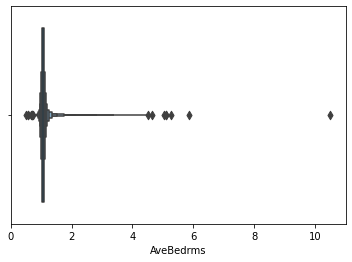

In [8]:
sns.boxenplot(x=df['AveBedrms'])
# in this graph it is visible that 10 Bedroms are outliers 

<AxesSubplot:xlabel='AveRooms'>

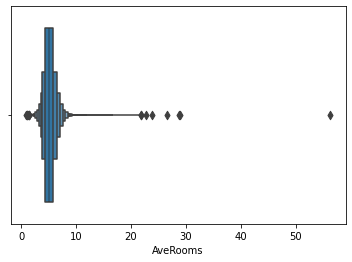

In [9]:
sns.boxenplot(x=df['AveRooms'])
# in this graph it is visible that 60 average Rooms are outliers 

<AxesSubplot:xlabel='MedInc'>

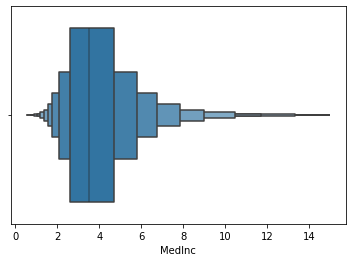

In [10]:
sns.boxenplot(x=df['MedInc'])

<AxesSubplot:xlabel='HouseAge'>

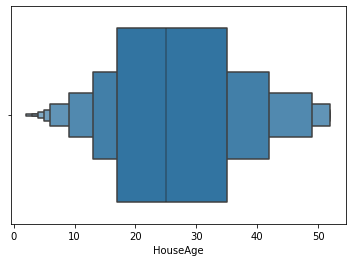

In [11]:
sns.boxenplot(x=df['HouseAge'])
# the average House Age is 25

## Data Adjustments

In [12]:
df = df[df['AveRooms']< 30]

In [13]:
df = df[df['AveBedrms']< 6]

In [14]:
#df['MedInc'] = df['MedInc']**2 

In [15]:
df['HouseAge'].astype(int)

0        15
1        17
2        27
3        16
4        52
         ..
24754    34
24755    33
24756    14
24757     8
24758    30
Name: HouseAge, Length: 61895, dtype: int32

In [16]:
abs(df.corr()['MedHouseVal'].sort_values(ascending=False))

MedHouseVal    1.000000
MedInc         0.701925
AveRooms       0.366727
HouseAge       0.103210
id             0.001358
Population     0.038479
AveOccup       0.048475
Longitude      0.056742
AveBedrms      0.067487
Latitude       0.116499
Name: MedHouseVal, dtype: float64

### Data preprocessing
Transforming the data to make it suitable for modeling. This can include normalizing, scaling, or encoding categorical variables.

In [17]:
df_train = df.iloc[:37137]
df_test = df.iloc[37137:]

In [18]:
x = df_train.drop(['MedHouseVal'],axis=1)
y = df_train['MedHouseVal']

In [19]:
from sklearn.metrics import r2_score, mean_squared_error,mean_absolute_error
from sklearn.linear_model import LinearRegression, ElasticNet, Ridge, Lasso
from sklearn.tree import ExtraTreeRegressor
from sklearn.ensemble import GradientBoostingRegressor
from xgboost import XGBRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split

In [20]:
def algo_test(x,y):
  
    L = LinearRegression()
    E = ElasticNet()
    R = Ridge()
    Lass = Lasso()
    ETR=ExtraTreeRegressor()
    GBR=GradientBoostingRegressor()
    XGBC= XGBRegressor()
          
    x_train, x_test, y_train, y_test=train_test_split(x,y,test_size=0.2,random_state=13)
    
    algos = [L,E,R,Lass,ETR,GBR,XGBC]
    algo_names = ['Linear','ElasticNet','Ridge','Lasso','Extra Tree','Gradient Boosting','XGradientBooting']
    r_squared = []
    rmse = []
    mae = []
        
    result = pd.DataFrame(columns = ['R_Squared','RMSE','MAE'],index = algo_names)
       
    for algo in algos:
        algo.fit(x_train,y_train)
             
        r_squared.append(r2_score(y_test,algo.predict(x_test)))
        rmse.append(mean_squared_error(y_test, algo.predict(x_test))**.5)
        mae.append(mean_absolute_error(y_test, algo.predict(x_test)))

    result.R_Squared = r_squared
    result.RMSE = rmse
    result.MAE= mae
    
    return result.sort_values('R_Squared', ascending=False)

### Data Modeling 
Creating models to make predictions or classify the data.

In [21]:
algo_test(x,y)

,R_Squared,RMSE,MAE
XGradientBooting,0.746899,0.583465,0.417701
Gradient Boosting,0.733111,0.599147,0.433645
Linear,0.600128,0.733379,0.540136
Ridge,0.600121,0.733386,0.540141
ElasticNet,0.418765,0.884187,0.685509
Extra Tree,0.403721,0.895556,0.627097
Lasso,0.274265,0.988000,0.776855
